# EDA Lanzamientos de misiones espaciales

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import calendar

In [45]:
df = pd.read_csv('mission_launches.csv')
""" df.dtypes """
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Limpieza y formateo de datos

Eliminaremos las columnas 'Unnamed 0.1' y 'Unnamed 0' ya que estas no aportan nada de informacion

In [46]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [47]:
#Chequeamos las columnas con valores nulos
df.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Vemos que la unica columna con valores nulos es la columna de precios entonces lo que haremos ser crear un promedio y reemplazarlo

In [57]:
#Convertiremos la columna Price a enteros
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
#Ahora reemplazaremos los valores donde hay un cero por el promedio del resto de la columna precios
df['Price'].fillna(df['Price'].mean(), inplace=True)
#Ponemos los valores solo con dos decimales 
df = df.round(2)

C:\Users\dell\AppData\Local\Temp\ipykernel_12828\3263910950.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


Ahora cambiaremos los valores de la columna 'Rocket_Status' de 'StatusRetired' y 'StatusRetired' a 'Active' y 'Retired'

In [58]:
df.replace({"StatusActive" : 'Active',
            "StatusRetired" : 'Retired'})

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,Active,129.80,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,Active,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,129.80,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,Retired,129.80,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,129.80,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,Retired,129.80,Success


Ahora agregaremos las columnas 'Year' y 'Month' ya que las necesitaremos para nuestro analisis

In [65]:
#Convertimos la columna Date a datetime 
df["Date"]= pd.to_datetime(df["Date"], errors="coerce")#4
#Chequeamos si algunas fechas no se establecieron correctamente
print(df['Date'].isna().sum())
#como vemos hay 126 filas que no se establecieron correctamente, estas fillas no constituyen nisiquiera un 10% de la
#informacion total de nuestro dataframe entonces las vamos a eliminar 
df = df.dropna(subset=['Date'])

126


In [75]:
#Recien ahora creamos las columnas year y month
df['Month'] = df["Date"].dt.month
df['Year'] = df["Date"].dt.year
#Como el mes lo pone en numero lo transformamos a mes propiamente dicho
def month(x):
    return calendar.month_name[int(x)] if not np.isnan(x) else np.nan#esta linea me la saque de stackOverflow
df['Month'] = df.Month.apply(month)#gracias @Shurlena

df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_12828\2393979663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df["Date"].dt.month
C:\Users\dell\AppData\Local\Temp\ipykernel_12828\2393979663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df["Date"].dt.year
C:\Users\dell\AppData\Local\Temp\ipykernel_12828\2393979663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,August,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,August,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.80,Success,August,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,July,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,July,2020


### EDA

#### ¿Qué organización lanzó más misiones espaciales en un año determinado?

Aqui no nos especifican el año y podemos elegir cualquiera, pero para tener una vision mucho mas clara lo que haremos sera contar cuantos lanzamientos hubo por año y los tres primero años con mas lanzamientos seran los que utilizaremos para resolver esta pregunta.

In [87]:
df_launch_year = df.groupby("Year").count()
df_launch_year=df_launch_year.rename(columns={"Organisation" : 'Number Of Launches'})
df_launch_year[['Number Of Launches']].sort_values(by='Number Of Launches',ascending=False).head(3)

,Number Of Launches
Year,
2018,117
1971,116
1975,112


Ya tenemos lo años con mas lanzamientos, ahora haremos el analisis de cada uno.

In [105]:
df2018 = df.loc[df['Year']==2018]
df2018 = df2018.groupby('Organisation').size().sort_values(ascending=False).reset_index(name='Launch Count')
df2018

,Organisation,Launch Count
0,CASC,37
1,SpaceX,21
2,Arianespace,11
3,Roscosmos,11
4,ULA,8
5,ISRO,7
6,VKS RF,5
7,MHI,4
8,Rocket Lab,3
9,Blue Origin,2


La organizacion que hizo mas lanzamientos en el año con mas lanzamientos fue CASC, ahora lo veremos de una forma mas grafica 

Text(0, 0.5, 'Number of launches')

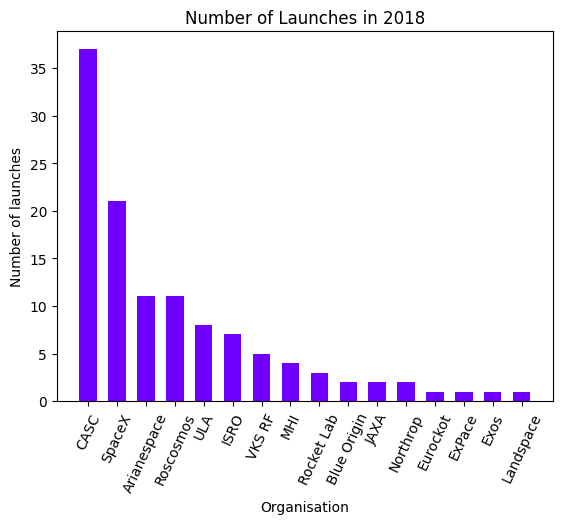

In [111]:
plt.bar(df2018["Organisation"], df2018["Launch Count"], width=0.6, color="#6F00FF")
plt.title("Number of Launches in 2018")
plt.xticks(df2018['Organisation'], rotation=65)
plt.xlabel("Organisation")
plt.ylabel("Number of launches")   

Ahora chequearemos los otros dos años

In [113]:
df1971 = df.loc[df['Year']==1971]
df1971 = df1971.groupby('Organisation').size().sort_values(ascending=False).reset_index(name='Launch Count')
df1971

,Organisation,Launch Count
0,RVSN USSR,90
1,General Dynamics,6
2,Martin Marietta,4
3,US Air Force,4
4,ISAS,3
5,ASI,2
6,CNES,2
7,NASA,2
8,CASC,1
9,CECLES,1


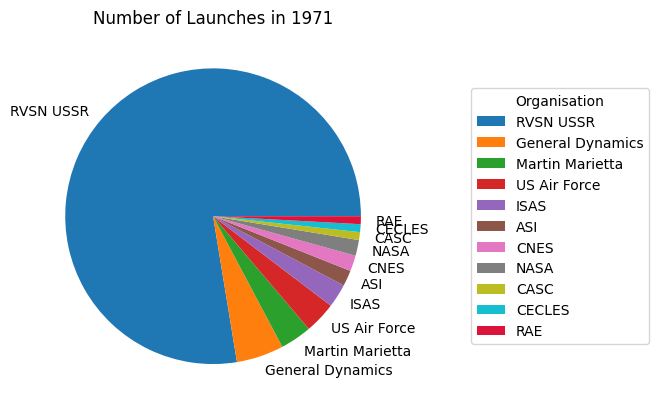

In [127]:
plt.title("Number of Launches in 1971")
plt.pie(df1971["Launch Count"], labels = df1971["Organisation"], colors=['tab:blue', 'tab:orange', 'tab:green',
                                                                         'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
                                                                         'tab:gray', 'tab:olive', 'tab:cyan', 'crimson'])
plt.legend(title = "Organisation",loc="center left", bbox_to_anchor=(1.18, 0.5))

In [128]:
df1975 = df.loc[df['Year']==1975]
df1975 = df1975.groupby('Organisation').size().sort_values(ascending=False).reset_index(name='Launch Count')
df1975

,Organisation,Launch Count
0,RVSN USSR,88
1,Martin Marietta,7
2,General Dynamics,5
3,CASC,3
4,CNES,3
5,US Air Force,2
6,ASI,1
7,ISAS,1
8,MHI,1
9,NASA,1


Como vemos, los valores no varian mucho asi que no lo vamos a graficar. 

### ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

Aqui lo que hacermo sera hacer un promedio de los costos de misiones en cada año.

In [155]:
df_costs_year = df[['Year', 'Price']].groupby("Year").mean('Price').reset_index()
df_costs_year = df_costs_year.sort_values(by='Year', ascending=False).head(50).round(2)
df_costs_year

,Year,Price
63,2020,69.42
62,2019,81.91
61,2018,80.87
60,2017,85.57
59,2016,93.19
58,2015,102.57
57,2014,108.32
56,2013,101.64
55,2012,127.19
54,2011,141.68


Como podemos ver las cifras a desde 1957 hasta 1980 son exactamente las mismas, esto es porque en esas filas no existian valores de precion y se reemplazaron por el promedio, entonces el analisis lo haremos a partir de 1981 que tenemos cifras un poco mas exactas.

In [158]:
df_costs_year = df_costs_year.loc[df_costs_year['Year']>=1981]
df_costs_year

,Year,Price
63,2020,69.42
62,2019,81.91
61,2018,80.87
60,2017,85.57
59,2016,93.19
58,2015,102.57
57,2014,108.32
56,2013,101.64
55,2012,127.19
54,2011,141.68


([<matplotlib.axis.XTick at 0x293812725d0>,
 [Text(2020, 0, '2020'),
  Text(2019, 0, '2019'),
  Text(2018, 0, '2018'),
  Text(2017, 0, '2017'),
  Text(2016, 0, '2016'),
  Text(2015, 0, '2015'),
  Text(2014, 0, '2014'),
  Text(2013, 0, '2013'),
  Text(2012, 0, '2012'),
  Text(2011, 0, '2011'),
  Text(2010, 0, '2010'),
  Text(2009, 0, '2009'),
  Text(2008, 0, '2008'),
  Text(2007, 0, '2007'),
  Text(2006, 0, '2006'),
  Text(2005, 0, '2005'),
  Text(2004, 0, '2004'),
  Text(2003, 0, '2003'),
  Text(2002, 0, '2002'),
  Text(2001, 0, '2001'),
  Text(2000, 0, '2000'),
  Text(1999, 0, '1999'),
  Text(1998, 0, '1998'),
  Text(1997, 0, '1997'),
  Text(1996, 0, '1996'),
  Text(1995, 0, '1995'),
  Text(1994, 0, '1994'),
  Text(1993, 0, '1993'),
  Text(1992, 0, '1992'),
  Text(1991, 0, '1991'),
  Text(1990, 0, '1990'),
  Text(1989, 0, '1989'),
  Text(1988, 0, '1988'),
  Text(1987, 0, '1987'),
  Text(1986, 0, '1986'),
  Text(1985, 0, '1985'),
  Text(1984, 0, '1984'),
  Text(1983, 0, '1983'),
  Text

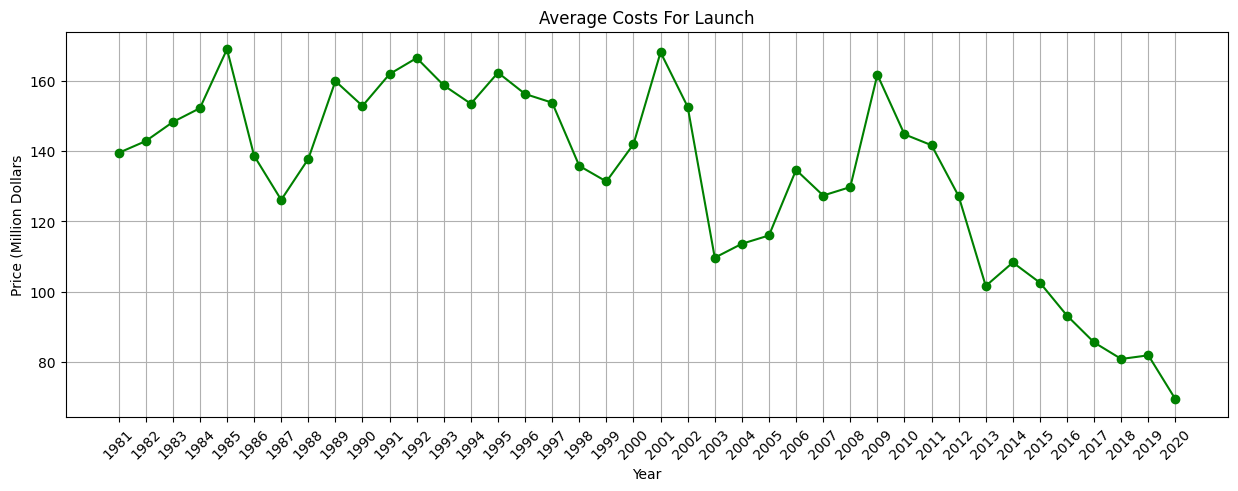

In [160]:
plt.figure(figsize=(15,5))
plt.plot(df_costs_year["Year"], df_costs_year["Price"], marker='o', color="green")
plt.title("Average Costs For Launch")
plt.xlabel("Year")
plt.ylabel('Price (Million Dollars')
plt.grid(True)
plt.xticks(df_costs_year["Year"], rotation=45)

### ¿Qué meses son los más populares para los lanzamientos?

Esto es muy similar a lo que hemos venido haciendo, agruparemos los lanzamientos por mes y luego los graficaremos en forma de barra.

In [174]:
df_launch_month = df.groupby("Month").count().rename(columns={"Organisation" : 'Number Of Launches'})
df_launch_month = df_launch_month[['Number Of Launches']].sort_values(by='Number Of Launches', ascending=False).reset_index()
df_launch_month

,Month,Number Of Launches
0,December,430
1,June,386
2,October,375
3,April,366
4,August,358
5,September,354
6,March,349
7,July,347
8,November,325
9,February,323


Text(0, 0.5, 'Number of launches')

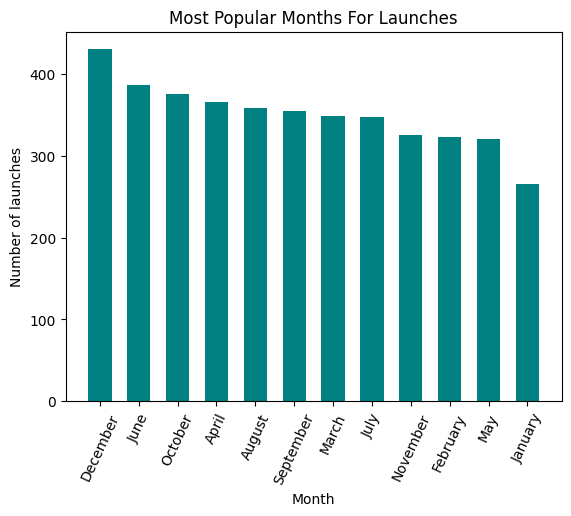

In [181]:
plt.bar(df_launch_month["Month"], df_launch_month["Number Of Launches"], width=0.6, color="teal")
plt.title("Most Popular Months For Launches")
plt.xticks(df_launch_month['Month'], rotation=65)
plt.xlabel("Month")
plt.ylabel("Number of launches")   

### ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

Haremos el recuento de misiones fallidas y existosas a lo largo de los años y graficaremos usando un grafico de areas apiladas.

In [223]:
#Agruparemos todos los tipos de fallo en una sola columna 
df['Mission_Status'] = df['Mission_Status'].replace(['Partial Failure', 'Failure', 'Prelaunch Failure'], 'Failure')
#Ahora Los agruparesmos por a;o
df_missions = df.groupby(["Year", "Mission_Status"]).size().unstack(fill_value=0).reset_index()
df_missions 

Mission_Status,Year,Failure,Success
0,1957,1,2
1,1958,16,6
2,1959,12,8
3,1960,19,19
4,1961,20,32
...,...,...,...
59,2016,4,84
60,2017,7,83
61,2018,4,113
62,2019,7,100


Text(0, 0.5, 'Number of Missions')

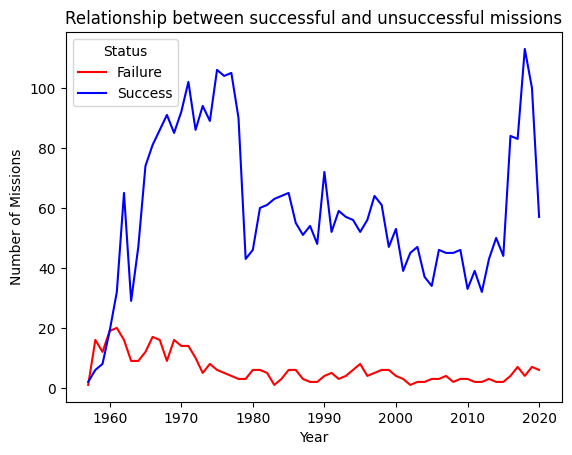

In [246]:
plt.plot(df_missions['Year'], df_missions['Failure'], color="red")
plt.plot(df_missions['Year'], df_missions['Success'], color="blue")
plt.legend(['Failure', 'Success'],title = "Status")
plt.title("Relationship between successful and unsuccessful missions")
plt.xlabel("Year")
plt.ylabel("Number of Missions")